<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana8/Notebooks/Red_Bayesiana_vs_Arbol_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arbol de decisión

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz  

#para visualizar el arbol desde el formato .dot
from IPython.display import Image
from pydotplus import graph_from_dot_data



In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Datos/Titanic Kaggle/titanic_rb.csv')
print(titanic.shape)
titanic.head()

(1309, 6)


,Survived,Pclass,Gender,Age,Embarked,Relatives
0,False,3,Male,adult,S,True
1,True,1,Female,adult,C,True
2,True,3,Female,adult,S,False
3,True,1,Female,adult,S,True
4,False,3,Male,adult,S,False


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   1309 non-null   bool  
 1   Pclass     1309 non-null   int64 
 2   Gender     1309 non-null   object
 3   Age        1309 non-null   object
 4   Embarked   1307 non-null   object
 5   Relatives  1309 non-null   bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 43.6+ KB


In [ ]:
titanic['Age'].value_counts()

adult      796
old        264
teen       158
toddler     44
kid         35
baby        12
Name: Age, dtype: int64

In [ ]:
titanic = pd.get_dummies(titanic, drop_first=True )

titanic.head()

,Survived,Pclass,Relatives,Gender_Male,Age_baby,Age_kid,Age_old,Age_teen,Age_toddler,Embarked_Q,Embarked_S
0,False,3,True,1,0,0,0,0,0,0,1
1,True,1,True,0,0,0,0,0,0,0,0
2,True,3,False,0,0,0,0,0,0,0,1
3,True,1,True,0,0,0,0,0,0,0,1
4,False,3,False,1,0,0,0,0,0,0,1


In [ ]:
titanic.shape[1]

11

In [ ]:
X = titanic.drop('Survived', axis=1)
Z = titanic['Survived']

In [ ]:
profundidad = None

#Entrenamiento del modelo
clasificador = DecisionTreeClassifier( max_depth=profundidad,
                                criterion="entropy",
                                min_samples_split= 2, 
                                random_state=0).fit(X, Z)




In [ ]:
titanic['Survived'].value_counts(normalize=True)

False    0.622613
True     0.377387
Name: Survived, dtype: float64

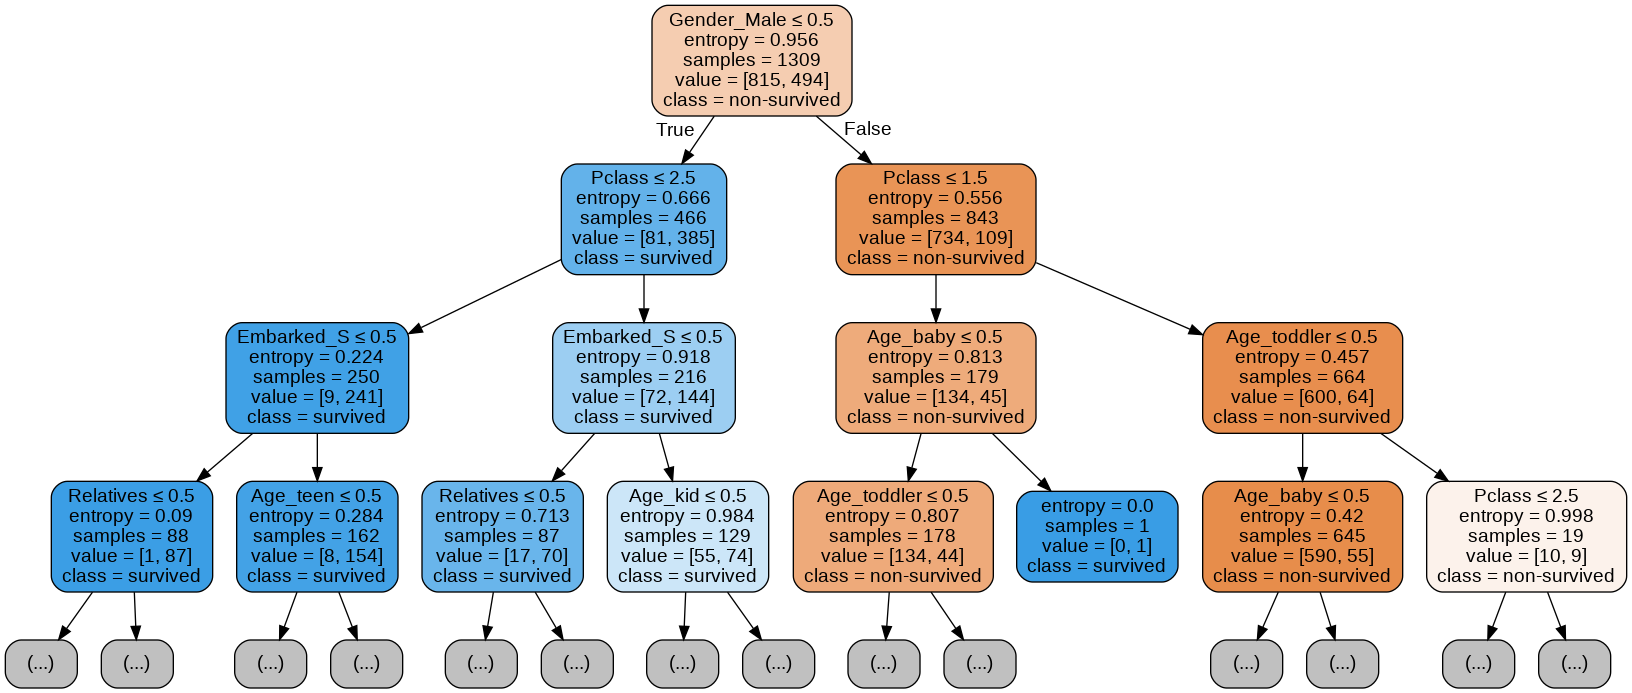

In [ ]:

from IPython.display import Image
from pydotplus import graph_from_dot_data



dot_data = export_graphviz(clasificador, rounded = True, 
                           filled = True, 
                           special_characters = True, 
                           feature_names = X.columns,
                           max_depth = 3,
                           class_names = ['non-survived','survived'])

graph = graph_from_dot_data(dot_data)

Image(graph.create_png())